In [1]:
import pandas as pd
from matplotlib import pyplot as plt

file_name = 'life-expectancy-vs-gdp-per-capita.csv'

df = pd.read_csv(file_name)

# Color mapping for continents
dict = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'North America':'yellow',
    'South America':'grey',
    'Oceania':'black'
}

In [2]:
# Filter on the most recent data
df2015 = df[df.Year == 2015][df.Code != ''][df.Code != 'OWID_WRL']
df1950 = df[df.Year == 1950][df.Code != ''][df.Code != 'OWID_WRL']
dfworld = df[df.Code == 'OWID_WRL'][df.Year > 1950]

/tmp/ipykernel_1129/1145498454.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2015 = df[df.Year == 2015][df.Code != ''][df.Code != 'OWID_WRL']
/tmp/ipykernel_1129/1145498454.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1950 = df[df.Year == 1950][df.Code != ''][df.Code != 'OWID_WRL']
/tmp/ipykernel_1129/1145498454.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfworld = df[df.Code == 'OWID_WRL'][df.Year > 1950]


In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62703 entries, 0 to 62702
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Entity                                 62703 non-null  object 
 1   Code                                   58395 non-null  object 
 2   Year                                   62703 non-null  int64  
 3   Life expectancy at birth (historical)  20449 non-null  float64
 4   GDP per capita                         19876 non-null  float64
 5   417485-annotations                     21 non-null     object 
 6   Population (historical estimates)      57718 non-null  float64
 7   Continent                              285 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.8+ MB


,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.7,1156.0,NaN,7480464.0,NaN
2,Afghanistan,AFG,1951,28.0,1170.0,NaN,7571542.0,NaN
3,Afghanistan,AFG,1952,28.4,1189.0,NaN,7667534.0,NaN
4,Afghanistan,AFG,1953,28.9,1240.0,NaN,7764549.0,NaN


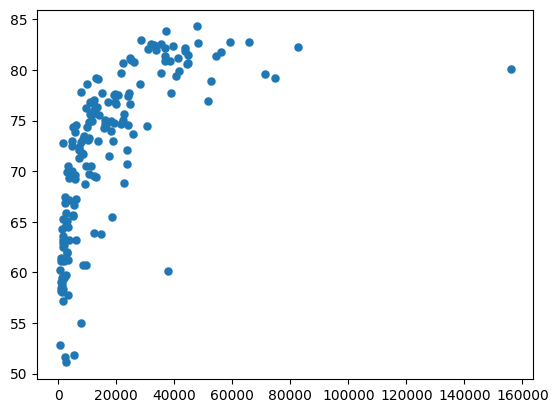

In [4]:
plt.scatter(df2015['GDP per capita'],df2015['Life expectancy at birth (historical)'],linewidths=0.1)

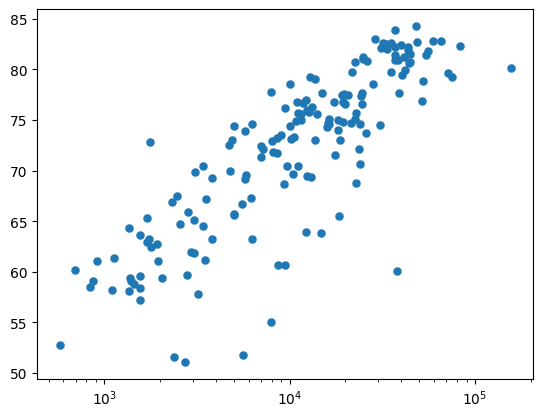

In [5]:
plt.scatter(df2015['GDP per capita'],df2015['Life expectancy at birth (historical)'],linewidths=0.1)
# put the x-axis on a logarithmic scale
ax = plt.gca()
ax.set_xscale('log')


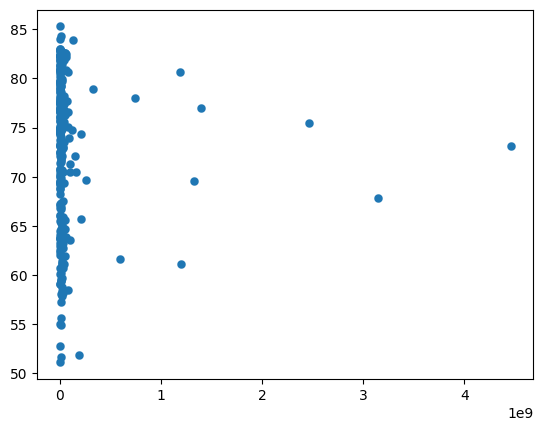

In [6]:
plt.scatter(df2015['Population (historical estimates)'],df2015['Life expectancy at birth (historical)'],linewidths=0.1)

(array([ 1.,  0.,  1.,  0.,  2.,  4.,  9., 19., 26., 22., 18., 17., 23.,
        16., 19., 22., 19.,  9., 18., 10.]),
 array([13.8 , 16.69, 19.58, 22.47, 25.36, 28.25, 31.14, 34.03, 36.92,
        39.81, 42.7 , 45.59, 48.48, 51.37, 54.26, 57.15, 60.04, 62.93,
        65.82, 68.71, 71.6 ]),
 <BarContainer object of 20 artists>)

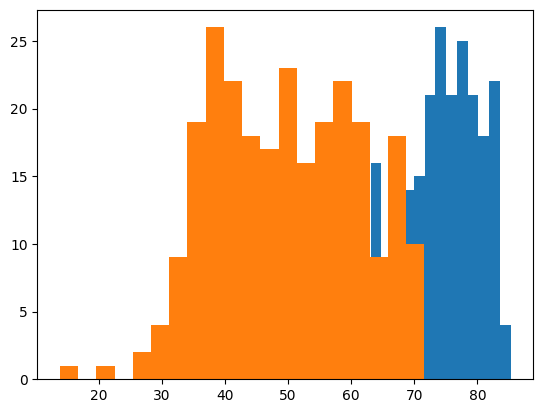

In [7]:
# HISTOGRAMS
plt.hist(df2015['Life expectancy at birth (historical)'],bins=20)
plt.hist(df1950['Life expectancy at birth (historical)'],bins=20)


([<matplotlib.axis.YTick at 0x7feee5b00910>,
 [Text(0, 0, '0'),
  Text(0, 2000000000, '2B'),
  Text(0, 4000000000, '4B'),
  Text(0, 6000000000, '6B'),
  Text(0, 8000000000, '8B'),
  Text(0, 10000000000, '10B')])

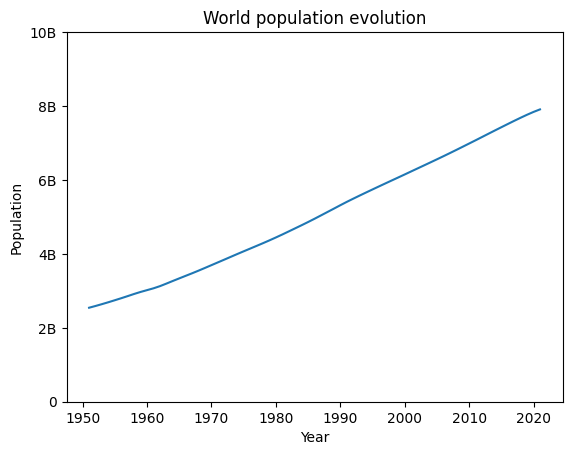

In [8]:
# DATA VISUALISATION

plt.plot(dfworld['Year'],dfworld['Population (historical estimates)'])

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World population evolution')
# set up the desired intervals, min and max
plt.yticks([0,2000000000,4000000000,6000000000,8000000000,10000000000],
           ['0','2B','4B','6B','8B','10B']) 

([<matplotlib.axis.XTick at 0x7feee5b71720>,
 [Text(1000, 0, '1k'), Text(10000, 0, '10k'), Text(100000, 0, '100k')])

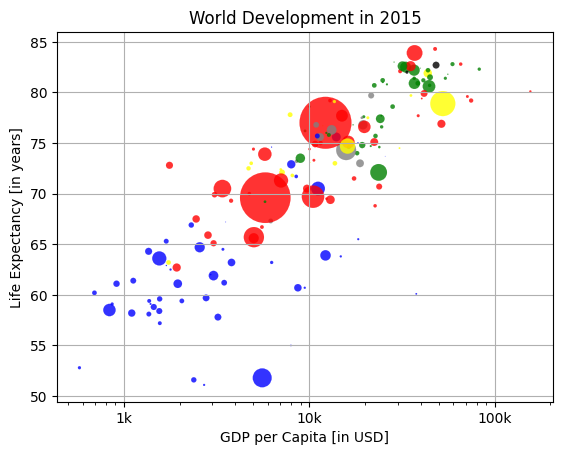

In [9]:
# Implementation of the color mapping by continent in 'col'

col = []
continent = list(df2015.Continent)

for item in continent:
    if item in dict.keys():
        col.append(dict[item])
    else:
        col.append('black')

# Scatter taking 'c' as an argument defining the dot color

plt.scatter(df2015['GDP per capita'],df2015['Life expectancy at birth (historical)'],
            # add the 's' (size) argument to adjut the dots based on the country population
            s=df2015['Population (historical estimates)']/1000000,linewidths=0.1,
            c = col, alpha=0.8)

# put the x-axis on a logarithmic scale
ax = plt.gca()
ax.set_xscale('log')

xlab = 'GDP per Capita [in USD]'
ylab = 'Life Expectancy [in years]'
title = 'World Development in 2015'

plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.grid(True)    # Add a grid


# Definition of tick_val and tick_lab
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']

# Adapt the ticks on the x-axis
plt.xticks(tick_val,tick_lab)

In [10]:
# DICTIONNARIES

pop = [30.55, 2.77, 39.21]
countries =["Afhanistan", "Albania", "Algeria"]

# Dictionary creation based on 2 lists

world = {}
n = 0

while n < len(pop):
    world[countries[n]]=pop[n]
    n += 1

In [11]:
# We add an item to the dictionary

world["Sealand"] = 0.000027
print(world)

{'Afhanistan': 30.55, 'Albania': 2.77, 'Algeria': 39.21, 'Sealand': 2.7e-05}


In [12]:
# We remove the item 

del(world['Sealand'])
print(world)

{'Afhanistan': 30.55, 'Albania': 2.77, 'Algeria': 39.21}


In [13]:
# Dictionary of dictionaries
europe = { 'spain': { 'capital':'madrid', 'population':46.77 },
           'france': { 'capital':'paris', 'population':66.03 },
           'germany': { 'capital':'berlin', 'population':80.62 },
           'norway': { 'capital':'oslo', 'population':5.084 } }

# Print out the capital of France
print(europe['france']['capital'])

# Create sub-dictionary data
data = {'capital':'roma', 'population':59.83}

# Add data to europe under key 'italy'
europe['italy']=data

# Print europe
print(europe)

paris
{'spain': {'capital': 'madrid', 'population': 46.77}, 'france': {'capital': 'paris', 'population': 66.03}, 'germany': {'capital': 'berlin', 'population': 80.62}, 'norway': {'capital': 'oslo', 'population': 5.084}, 'italy': {'capital': 'roma', 'population': 59.83}}


In [14]:
# PANDAS

# Create a DataFrame from a dictionary
newdf = pd.DataFrame(europe)

# Create a DataFrame from a csv file
df = pd.read_csv(file_name, index_col=0)   # index_col -> avoid line numerotation as 1st column

In [15]:
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]

In [16]:
my_dict = {'country': names, 'drives_right': dr, 'cars_per_cap': cpc}

cars = pd.DataFrame(my_dict)

In [17]:
# This result in a DataFrame but the row label are not correctly set
cars

,country,drives_right,cars_per_cap
0,United States,True,809
1,Australia,False,731
2,Japan,False,588
3,India,False,18
4,Russia,True,200
5,Morocco,True,70
6,Egypt,True,45


In [18]:
# To solve this
row_labels = ['US', 'AUS', 'JPN', 'IN', 'RU', 'MOR', 'EG']

# We set up the row labels through the 'index' method
cars.index = row_labels

In [19]:
# Cleaner now

cars

,country,drives_right,cars_per_cap
US,United States,True,809
AUS,Australia,False,731
JPN,Japan,False,588
IN,India,False,18
RU,Russia,True,200
MOR,Morocco,True,70
EG,Egypt,True,45


In [20]:
# Column access []
cars.drives_right
cars['drives_right']
type(cars['drives_right'])

pandas.core.series.Series

In [21]:
type(cars[['drives_right']])

pandas.core.frame.DataFrame

In [22]:
# Multiple colums
cars[['country','drives_right']]

,country,drives_right
US,United States,True
AUS,Australia,False
JPN,Japan,False
IN,India,False
RU,Russia,True
MOR,Morocco,True
EG,Egypt,True


In [23]:
# Row access []
cars[1:4]

,country,drives_right,cars_per_cap
AUS,Australia,False,731
JPN,Japan,False,588
IN,India,False,18


In [24]:
# Rwo access: loc and iloc
cars.loc["RU"]   # Row as pandas series
cars.loc[["RU"]]   # Row as a DataFrame

,country,drives_right,cars_per_cap
RU,Russia,True,200


In [25]:
# Multiple rows selection
cars.loc[["RU","IN","JPN"]]

,country,drives_right,cars_per_cap
RU,Russia,True,200
IN,India,False,18
JPN,Japan,False,588


In [26]:
# Row and Column loc (based on row label)
cars.loc[["RU","IN","JPN"], ['country','drives_right']]


,country,drives_right
RU,Russia,True
IN,India,False
JPN,Japan,False


In [27]:
# All rows, few columns
cars.loc[:, ['country','drives_right']]

,country,drives_right
US,United States,True
AUS,Australia,False
JPN,Japan,False
IN,India,False
RU,Russia,True
MOR,Morocco,True
EG,Egypt,True


In [28]:
# Row access iloc (based on row index)
cars.iloc[[0,1,2]]

,country,drives_right,cars_per_cap
US,United States,True,809
AUS,Australia,False,731
JPN,Japan,False,588


In [29]:
# Row and colums iloc
cars.iloc[[0,1,2], [0,1]]

,country,drives_right
US,United States,True
AUS,Australia,False
JPN,Japan,False


In [30]:
# All rows, few columns iloc
cars.iloc[:, [0,1]]

,country,drives_right
US,United States,True
AUS,Australia,False
JPN,Japan,False
IN,India,False
RU,Russia,True
MOR,Morocco,True
EG,Egypt,True


In [31]:
# COMPARISON OPERATORS

import numpy as np

height = [170, 180, 175, 180]
weight = [70, 80, 75, 70]

np_height = np.array(height)    # converting list into array
np_weight = np.array(weight)
bmi = np_weight/(np_height/100)**2    # Body Mass Index
bmi

array([24.22145329, 24.69135802, 24.48979592, 21.60493827])

In [32]:
bmi > 23   # Return an array of boolean
bmi[bmi > 23]   # Return an array of the filtered bmi 

array([24.22145329, 24.69135802, 24.48979592])

In [33]:
# BOOLEAN OPERATORS

x, y = 12, 5

x > 5 and x < 15    # and
y < 7 or y > 13    # or

# For numpy, equivalent of and, or, not are logical_and(), logical_or(), logical_not()

np.logical_and(bmi > 21, bmi < 22)


array([False, False, False,  True])

In [34]:
# build the new array based on the conditions
bmi[np.logical_and(bmi > 21, bmi < 22)]

array([21.60493827])

In [35]:
# if, elif, else
z = 6
if z % 2 == 0:
    print(f"{z} is divisible by 2.")
elif z % 3 == 0:    # never reached
        print(f"{z} is divisible by 3.")
else:
    print(f"{z} is neither divisible by 2 or 3.")

6 is divisible by 2.


In [36]:
# Filtering pandas DataFrames

cars[cars['cars_per_cap'] > 500]

,country,drives_right,cars_per_cap
US,United States,True,809
AUS,Australia,False,731
JPN,Japan,False,588


In [37]:
cars[cars['cars_per_cap'] > 500][cars['cars_per_cap'] < 800]

/tmp/ipykernel_1129/1965840226.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cars[cars['cars_per_cap'] > 500][cars['cars_per_cap'] < 800]


,country,drives_right,cars_per_cap
AUS,Australia,False,731
JPN,Japan,False,588


In [38]:
# Alternative
sel = cars.cars_per_cap > 500 
cars[sel]


,country,drives_right,cars_per_cap
US,United States,True,809
AUS,Australia,False,731
JPN,Japan,False,588


In [39]:
# WHILE LOOP
offset = 8

# Code the while loop
while offset > 0:
    print("correcting...")
    offset -= 1
    print(offset)

correcting...
7
correcting...
6
correcting...
5
correcting...
4
correcting...
3
correcting...
2
correcting...
1
correcting...
0


In [40]:
# FOR LOOP

# areas list
areas = [11.25, 18.0, 20.0, 10.75, 9.50]

for index, elt in enumerate(areas) :   # enumerate to get the index of the list element
    print(f"room {index}: {elt}")

room 0: 11.25
room 1: 18.0
room 2: 20.0
room 3: 10.75
room 4: 9.5


In [41]:
# LOOP DATA STRUCTURES

# Dictionary
for key, value in europe.items():   # requites a dict method
    print(f"{key}: {value}")

spain: {'capital': 'madrid', 'population': 46.77}
france: {'capital': 'paris', 'population': 66.03}
germany: {'capital': 'berlin', 'population': 80.62}
norway: {'capital': 'oslo', 'population': 5.084}
italy: {'capital': 'roma', 'population': 59.83}


In [42]:
# 1D Numpy Arrays

for elt in bmi:
    print(f"{elt}")

24.221453287197235
24.691358024691358
24.489795918367346
21.604938271604937


In [43]:
# 2D Numpy Arrays

meas = np.array([np_height, np_weight])

for val in np.nditer(meas):   # function nditer to access the elements
    print(val)

170
180
175
180
70
80
75
70


In [44]:
# Pandas DataFrame

for column in cars:
    print(column)    # will print DataFrame columns

country
drives_right
cars_per_cap


In [45]:
for lab, row in cars.iterrows():    # iterrows method to iterate through rows
    print(lab)
    print(row)

US
country         United States
drives_right             True
cars_per_cap              809
Name: US, dtype: object
AUS
country         Australia
drives_right        False
cars_per_cap          731
Name: AUS, dtype: object
JPN
country         Japan
drives_right    False
cars_per_cap      588
Name: JPN, dtype: object
IN
country         India
drives_right    False
cars_per_cap       18
Name: IN, dtype: object
RU
country         Russia
drives_right      True
cars_per_cap       200
Name: RU, dtype: object
MOR
country         Morocco
drives_right       True
cars_per_cap         70
Name: MOR, dtype: object
EG
country         Egypt
drives_right     True
cars_per_cap       45
Name: EG, dtype: object


In [46]:
for lab, row in cars.iterrows():
    print(lab + ": " + str(row['cars_per_cap']))    # select specific colums

US: 809
AUS: 731
JPN: 588
IN: 18
RU: 200
MOR: 70
EG: 45


In [47]:
for lab, row in cars.iterrows():
    # create new columns and add values in the DF for each iteration
    cars.loc[lab, "name_lenght"] = len(row["country"])
cars

,country,drives_right,cars_per_cap,name_lenght
US,United States,True,809,13.0
AUS,Australia,False,731,9.0
JPN,Japan,False,588,5.0
IN,India,False,18,5.0
RU,Russia,True,200,6.0
MOR,Morocco,True,70,7.0
EG,Egypt,True,45,5.0


In [48]:
# "apply" function - same use as before but more elegant

cars["name_lenght"] = cars["country"].apply(len)
cars

,country,drives_right,cars_per_cap,name_lenght
US,United States,True,809,13
AUS,Australia,False,731,9
JPN,Japan,False,588,5
IN,India,False,18,5
RU,Russia,True,200,6
MOR,Morocco,True,70,7
EG,Egypt,True,45,5


In [49]:
cars["COUNTRY"] = cars["country"].apply(str.upper)    # notice the format here
cars

,country,drives_right,cars_per_cap,name_lenght,COUNTRY
US,United States,True,809,13,UNITED STATES
AUS,Australia,False,731,9,AUSTRALIA
JPN,Japan,False,588,5,JAPAN
IN,India,False,18,5,INDIA
RU,Russia,True,200,6,RUSSIA
MOR,Morocco,True,70,7,MOROCCO
EG,Egypt,True,45,5,EGYPT


In [50]:
# CASE STUDY: HACKER STATISTICS 

np.random.rand()

0.19577231885333013

In [51]:
# Generate the same random figure to garantee reproductibility -> 0.696469....
np.random.seed(123)

In [52]:
# To flip a coin 
coin = np.random.randint(0,2)    # generate 0 or 1

In [53]:
# Random walk
np.random.seed(123)
outcomes = []

for x in range(10):    # generates 10 iterations
    coin = np.random.randint(0,2)
    if coin == 0:
        outcomes.append('heads')
    else:
        outcomes.append('tails')

outcomes

['heads',
 'tails',
 'heads',
 'heads',
 'heads',
 'heads',
 'heads',
 'tails',
 'tails',
 'heads']

In [54]:
# This time, we look for the number of 'tails'
np.random.seed(123)
tails = [0]

for x in range(10):    
    coin = np.random.randint(0,2)
    tails.append(tails[x]+coin)

tails

[0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3]

In [69]:
# Initialize random_walk
random_walk = [0]

for x in range(100):
    step = random_walk[-1]
    # np.random.seed(123)
    dice = np.random.randint(1,7)

    if dice <= 2:
        step = max(0,step - 1)    # ensure step can't go below 0
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)
    random_walk.append(step)

print(random_walk)

[0, 0, 0, 2, 1, 2, 4, 5, 6, 11, 10, 11, 12, 13, 14, 15, 14, 19, 20, 21, 22, 21, 20, 19, 18, 17, 18, 19, 20, 26, 25, 24, 23, 24, 25, 26, 25, 26, 27, 26, 31, 32, 31, 30, 29, 28, 29, 28, 27, 29, 30, 33, 34, 36, 37, 38, 39, 38, 37, 38, 39, 40, 41, 40, 41, 42, 43, 46, 47, 48, 47, 48, 47, 48, 49, 50, 54, 53, 52, 53, 54, 55, 54, 55, 54, 55, 57, 62, 61, 62, 63, 64, 65, 66, 67, 66, 67, 68, 69, 71, 73]


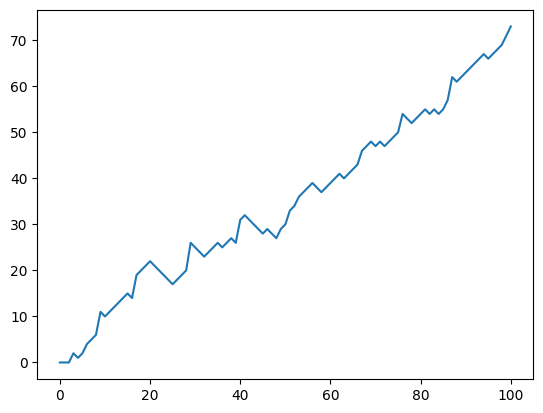

In [71]:
# Visualize the walk

plt.plot(random_walk)    # if one parameter is given, plt considers the list index as the second

In [90]:
# Simulation  of 10 occurrences

all_steps = []    # we store the final steps in this list
# Generate 10 occurences of the simulation
for x in range(0,10):
    random_walk = [0]

    for x in range(100):
        step = random_walk[-1]
        # np.random.seed(123)
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0,step - 1)    # ensure step can't go below 0
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)
    all_steps.append(random_walk)    # we store all the data in final steps

np_steps = np.array(all_steps)   # and convert into a numpy array
np_steps


array([[ 0,  0,  0, ..., 51, 50, 51],
       [ 0,  1,  0, ..., 71, 70, 71],
       [ 0,  6,  5, ..., 78, 80, 81],
       ...,
       [ 0,  1,  2, ..., 82, 83, 85],
       [ 0,  1,  2, ..., 48, 49, 50],
       [ 0,  1,  0, ..., 76, 75, 74]])

<function matplotlib.pyplot.show(close=None, block=None)>

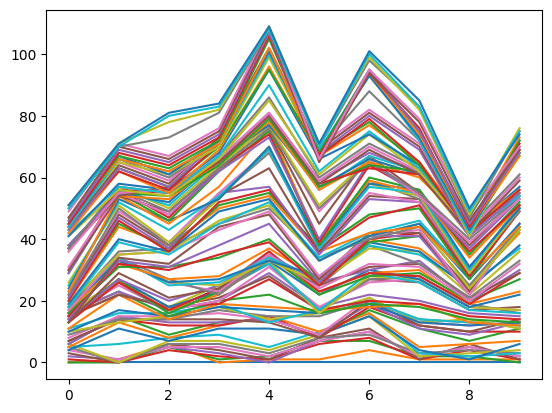

In [92]:
plt.plot(np_steps)
plt.show
# this is not what we want, the data need to be transposed

<function matplotlib.pyplot.show(close=None, block=None)>

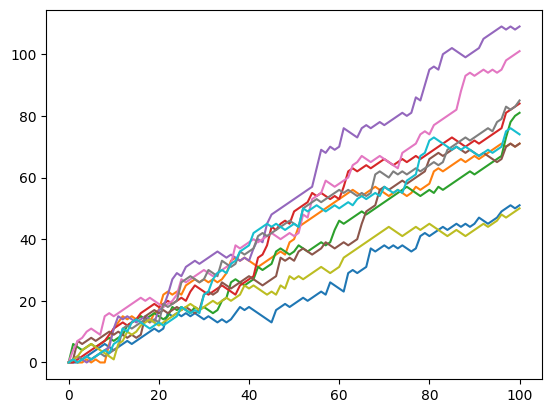

In [95]:
# np transpose 
plt.clf()
np_steps_t = np.transpose(np_steps)
plt.plot(np_steps_t)
plt.show
# plot each random walk

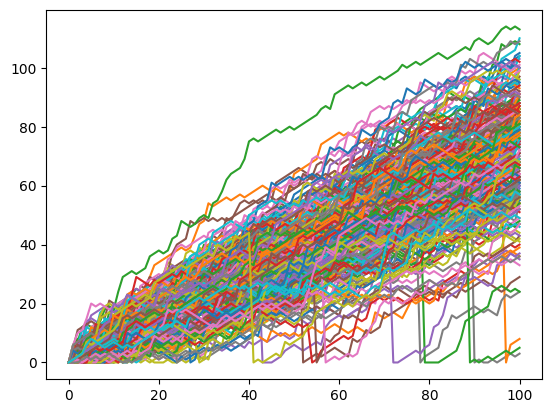

In [99]:
# Simulate random walk 250 times
all_walks = []
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()
# We notice the deep dive on 250 simulations

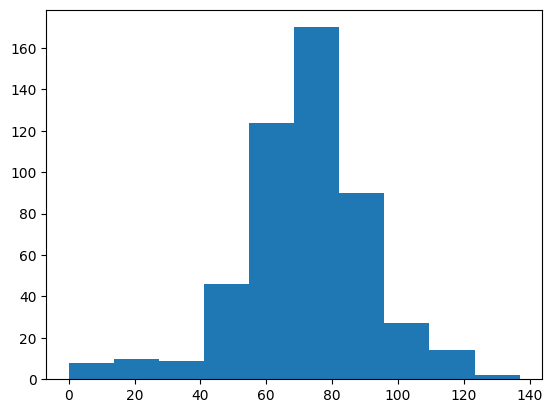

In [111]:
# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

In [112]:
# Final calculation to know the chance of getting = or higher than 60 steps

len(ends[ends > 60])/500

0.768